                    
q_0: ──■────────────
       │            
q_1: ──┼────■───────
       │    │       
q_2: ──┼────┼────■──
       │  ┌─┴─┐┌─┴─┐
q_3: ──┼──┤ X ├┤ X ├
     ┌─┴─┐└───┘└───┘
q_4: ┤ X ├──────────
     └───┘          
     ┌───┐┌──────────────┐┌───┐┌─┐      
q_0: ┤ H ├┤0             ├┤ H ├┤M├──────
     ├───┤│              │├───┤└╥┘┌─┐   
q_1: ┤ H ├┤1             ├┤ H ├─╫─┤M├───
     ├───┤│              │├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├┤2 circuit-298 ├┤ H ├─╫──╫─┤M├
     └───┘│              │└───┘ ║  ║ └╥┘
q_3: ─────┤3             ├──────╫──╫──╫─
          │              │      ║  ║  ║ 
q_4: ─────┤4             ├──────╫──╫──╫─
          └──────────────┘      ║  ║  ║ 
c: 3/═══════════════════════════╩══╩══╩═
                                0  1  2 
Counts: {'001': 10149, '111': 9936, '110': 9905, '000': 10010}


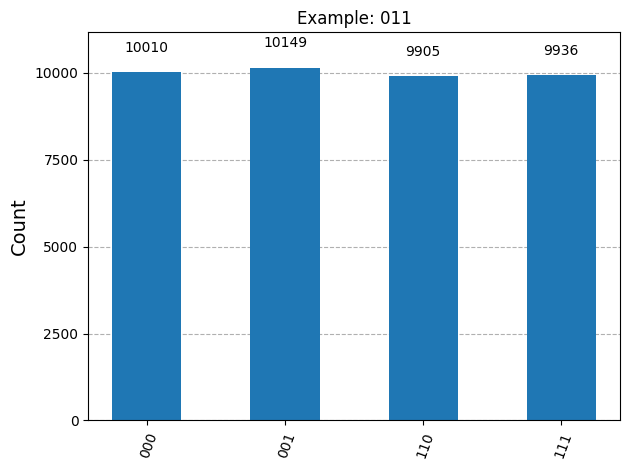

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Simon's algorithm circuit
def simon_algorithm(oracle):
    qc = QuantumCircuit(n + m, n)
    qc.h(list(range(n))) # Apply Hadamard gates to first n qubits
    qc.append(oracle, range(n + m))  # Apply oracle
    qc.h(list(range(n))) # Apply Hadamard gates to first n qubits
    qc.measure(range(n), range(n))
    return qc

def b_matrix_generator(case: str):
    if case == "100":
        # secret = 100 ⇒ rows orthogonal to (1,0,0)
        return [[0,1,0],
                [0,0,1]]  # kernel span{100}
    elif case == "010":
        # secret = 010 ⇒ rows orthogonal to (0,1,0)
        return [[1,0,0],
                [0,0,1]]  # kernel span{010}
    elif case == "001":
        # secret = 001 ⇒ rows orthogonal to (0,0,1)
        return [[1,0,0],
                [0,1,0]]  # kernel span{001}
    elif case == "110":
        # secret = 110 ⇒ need v·s = v0⊕v1 = 0
        return [[1,1,0],
                [0,0,1]]  # kernel span{110}
    elif case == "101":
        # secret = 101 ⇒ need v·s = v0⊕v2 = 0
        return [[1,0,1],
                [0,1,0]]  # kernel span{101}
    elif case == "011":
        # secret = 011 ⇒ need v·s = v1⊕v2 = 0
        return [[0,1,1],
                [1,0,0]]  # kernel span{011}
    elif case == "111":
        # secret = 111 ⇒ need v·s = v0⊕v1⊕v2 = 0
        return [[1,1,0],
                [0,1,1]]  # kernel span{111}
    else:
        raise ValueError("Only supports 3-bit secrets '100','010','001','110','101','011','111'")



# Simon's oracle generator
def simon_oracle(s: str):
    qc = QuantumCircuit(n + m)

    b_matrix = b_matrix_generator(s)

    for i in range(n):
        for j in range(m):
            if b_matrix[j][i] == 1:
                qc.cx(i, n + j)
    return qc

# Example usage case = "011"
n = 3
m = 2
case = "011"

oracle = simon_oracle(case)
qc = simon_algorithm(oracle)
print(oracle.draw("text"))
print(qc.draw("text"))

# Run on simulator
sim = Aer.get_backend("aer_simulator")
tqc = transpile(qc, sim)
result = sim.run(tqc, shots = 40000).result()
counts = result.get_counts()
print("Counts:", counts)
plot_histogram(counts, title="Example: "+ case)

                         
q_0: ──■─────────────────
       │                 
q_1: ──┼────■────■───────
       │    │    │       
q_2: ──┼────┼────┼────■──
     ┌─┴─┐┌─┴─┐  │    │  
q_3: ┤ X ├┤ X ├──┼────┼──
     └───┘└───┘┌─┴─┐┌─┴─┐
q_4: ──────────┤ X ├┤ X ├
               └───┘└───┘
     ┌───┐┌──────────────┐┌───┐┌─┐      
q_0: ┤ H ├┤0             ├┤ H ├┤M├──────
     ├───┤│              │├───┤└╥┘┌─┐   
q_1: ┤ H ├┤1             ├┤ H ├─╫─┤M├───
     ├───┤│              │├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├┤2 circuit-303 ├┤ H ├─╫──╫─┤M├
     └───┘│              │└───┘ ║  ║ └╥┘
q_3: ─────┤3             ├──────╫──╫──╫─
          │              │      ║  ║  ║ 
q_4: ─────┤4             ├──────╫──╫──╫─
          └──────────────┘      ║  ║  ║ 
c: 3/═══════════════════════════╩══╩══╩═
                                0  1  2 
Counts: {'000': 9954, '011': 9960, '101': 10001, '110': 10085}


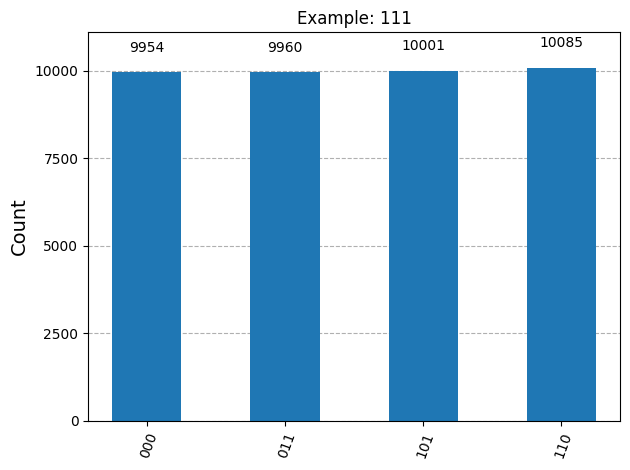

In [34]:
# Example usage case = "111"
n = 3
m = 2
case = "111"

oracle = simon_oracle(case)
qc = simon_algorithm(oracle)
print(oracle.draw("text"))
print(qc.draw("text"))

# Run on simulator
sim = Aer.get_backend("aer_simulator")
tqc = transpile(qc, sim)
result = sim.run(tqc, shots = 40000).result()
counts = result.get_counts()
print("Counts:", counts)
plot_histogram(counts, title="Example: "+ case)

As expected, in both examples we measure strings perpendicular (binary dot product zero) to the secret.